In [79]:
### Load libraries

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
import pandas as pd
import numpy as np
import ssl
import dateparser # $ pip install dateparser
from bs4 import BeautifulSoup
import urllib.request
import datetime
import plotly.express as px
import re 

ssl._create_default_https_context = ssl._create_unverified_context


# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)


In [80]:
### Get Data
###Messi
url = 'https://es.wikipedia.org/wiki/Anexo:Estad%C3%ADsticas_de_Lionel_Messi#Temporada_2017-18'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./messi_data.html', 'w') as fo:
    fo.write(article);

##Cristiano Ronaldo

url = 'https://en.wikipedia.org/wiki/Cristiano_Ronaldo'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./cr_data.html', 'w') as fo:
    fo.write(article);

##Neymar

url = 'https://en.wikipedia.org/wiki/Neymar'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./neymar_data.html', 'w') as fo:
    fo.write(article);
    
##Antoine_Griezmann

url = 'https://en.wikipedia.org/wiki/Antoine_Griezmann'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./griezmann_data.html', 'w') as fo:
    fo.write(article);   

##Maradona

url = 'https://en.wikipedia.org/wiki/Diego_Maradona'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./maradona_data.html', 'w') as fo:
    fo.write(article);  


##Ronaldo

url = 'https://en.wikipedia.org/wiki/Ronaldo_(Brazilian_footballer)'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./ronaldo_data.html', 'w') as fo:
    fo.write(article);  

##Henry

url = 'https://en.wikipedia.org/wiki/Thierry_Henry'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./henry_data.html', 'w') as fo:
    fo.write(article);  
    
##Torres

url = 'https://en.wikipedia.org/wiki/Fernando_Torres'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./torres_data.html', 'w') as fo:
    fo.write(article);      
    
    
##Di Stefáno

url = 'https://en.wikipedia.org/wiki/Alfredo_Di_St%C3%A9fano'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('./distefano_data.html', 'w') as fo:
    fo.write(article);      
        
    
    
    

In [81]:
# Load article, turn into soup and get the
article = open('./messi_data.html').read()
soup = BeautifulSoup(article, 'html.parser')


##Create df with first season

season = "Temporada_2004-05"
pointer = soup.find('span', id=season)
table = pointer.findNext('table')
messi = pd.read_html(str(table))
messi=messi[0]
messi["Temporada"]=season

## Iterate for the remaining seasons

seasons = ["Temporada_2005-06",
          "Temporada_2006-07",
          "Temporada_2007-08",
          "Temporada_2008-09",
          "Temporada_2009-10",
          "Temporada_2010-11",
          "Temporada_2011-12",
          "Temporada_2012-13",
          "Temporada_2013-14",
          "Temporada_2014-15",
          "Temporada_2015-16",
          "Temporada_2016-17",
          "Temporada_2017-18",
          "Temporada_2018-19",
          "Temporada_2019-20"
          ]

for season in seasons:
    pointer = soup.find('span', id=season)
    table = pointer.findNext('table')
    messi_i = pd.read_html(str(table))
    messi_i=messi_i[0]
    messi_i["Temporada"]=season
    messi = messi.append(messi_i);

In [82]:
### Cleanup

messi=messi.rename(columns={"Goles": "Goles_Messi", "Asistencias": "Asistencias_Messi"})


messi["Goles_Messi"]=messi["Goles_Messi"].fillna(0)
messi["Asistencias_Messi"]=messi["Asistencias_Messi"].fillna(0)


messi["Temporada"] = messi["Temporada"].str.replace("Temporada_", "Season ") 

messi["Barcelona"]=messi["Resultado"].str.split(pat="-",expand=True)[0]
messi["Barcelona"]=pd.to_numeric(messi["Barcelona"])

messi["Adversario"]=messi["Resultado"].str.split(pat="-",expand=True)[1]
messi["Adversario"]=pd.to_numeric(messi["Adversario"])

messi["Resultado"] = np.where(messi["Barcelona"]>messi["Adversario"],"Win",
                             np.where(messi["Barcelona"]==messi["Adversario"],"Tie","Loss"))

messi["Competición"]= messi["Competición"].str.replace("-","")
messi["Competición"]= messi["Competición"].str.replace("\(","")
messi["Competición"]= messi["Competición"].str.replace("\)","")
messi["Competición"]= messi["Competición"].str.replace("\/","")
messi["Competición"]= messi["Competición"].str.replace("([\d-])","")
messi["Competición"]= messi["Competición"].str.replace("Del","del")
messi["Competición"]= messi["Competición"].str.replace("Copa de Rey","Copa del Rey")
messi["Competición"]= messi["Competición"].str.replace("Champios","Champions")
messi["Competición"]=messi["Competición"].str.strip()
messi["Competición"]= messi["Competición"].str.replace('^Liga$', 'La Liga')
messi["Competición"]=messi["Competición"].str.strip()

messi["Equipo"]=messi["Equipo"].str.strip()
messi["Equipo"]=messi["Equipo"].str.replace("Múnich","Munchen")
messi["Equipo"]=messi["Equipo"].str.replace("Munich","Munchen")
messi["Equipo"]=messi["Equipo"].str.replace("Copenhague","København")
messi["Equipo"]=messi["Equipo"].str.replace("Copenhagen","København")
messi["Equipo"]=messi["Equipo"].str.replace("Deportivo Alavés","Alavés")
messi["Equipo"]=messi["Equipo"].str.replace("Athletic Club","Athletic Bilbao")
messi["Equipo"]=messi["Equipo"].str.replace("Celta Vigo","Celta de Vigo")
messi["Equipo"]=messi["Equipo"].str.strip()
messi["Equipo"]= messi["Equipo"].str.replace('^Racing$', 'Racing Santander')
messi["Equipo"]= messi["Equipo"].str.replace('^Recreativo$', 'Recreativo Huelva')
messi["Equipo"]= messi["Equipo"].str.replace('^Deportivo$', 'Deportivo La Coruña')
messi["Equipo"]=messi["Equipo"].str.replace("S.S.C. Napoli","Napoli")
messi["Equipo"]=messi["Equipo"].str.replace("Sporting de Gijón","Sporting Gijón")
messi["Equipo"]=messi["Equipo"].str.replace("Villareal","Villarreal")
messi["Equipo"]=messi["Equipo"].str.replace("Ls Palmas","Las Palmas")
messi["Equipo"]=messi["Equipo"].str.strip()

messi["Goles_Messi_Logic"] = np.where(messi["Goles_Messi"]>0,1,0)
messi["Asistencias_Messi_Logic"] = np.where(messi["Asistencias_Messi"]>0,1,0)

#messi["Equipo"]=messi["Equipo"].replace("Racing","Racing Santander",inplace=True)

messi["Gol_o_Asistencia"] = messi["Goles_Messi_Logic"] + messi["Asistencias_Messi_Logic"]
messi["Gol_o_Asistencia"] = np.where(messi["Gol_o_Asistencia"]>0,1,0)

messi=messi.drop(columns=["Minuto","Minuto.1","Notas"])

In [83]:
# Cristiano Ronaldo
    
article = open('./cr_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

cr = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
                  
cr=cr[0].reset_index()

cr.columns = [' '.join(col).strip() for col in cr.columns.values]

cr["Season"]=cr["Season Season"]
cr["Matches"]=cr["Total Apps"]
cr["Goals"]=cr["Total Goals"]
cr=cr[["Season","Matches","Goals"]]

cr["Season"]=cr["Season"].str.replace("([\[]).*?([\]])", "\g<1>\g<2>")
cr["Season"]=cr["Season"].str.replace("\[","")
cr["Season"]=cr["Season"].str.replace("\]","")

cr= cr[cr['Season']!="Total"]
cr= cr[cr['Season']!="Career total"]
cr= cr[cr['Season']!="2020-21"]
cr=cr.groupby('Season').agg({'Matches':sum,'Goals':sum}).reset_index()
 
cr["Goal Ratio"] = cr["Goals"].astype(int)/cr["Matches"].astype(int)

cr['Season No'] = cr.index + 1 
cr=cr[["Season No", "Goal Ratio"]]


In [84]:
# Griezmann
    
article = open('./griezmann_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

griezmann = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
griezmann=griezmann[0].reset_index()

griezmann.columns = [' '.join(col).strip() for col in griezmann.columns.values]

griezmann["Season"]=griezmann["Season Season"]
griezmann["Matches"]=griezmann["Total Apps"]
griezmann["Goals"]=griezmann["Total Goals"]
griezmann=griezmann[["Season","Matches","Goals"]]

griezmann= griezmann[griezmann['Season']!="Total"]
griezmann= griezmann[griezmann['Season']!="NY Cosmos total"]
griezmann= griezmann[griezmann['Season']!="Career total"]
griezmann= griezmann[griezmann['Season']!="2020-21"]
griezmann=griezmann.groupby('Season').agg({'Matches':sum,'Goals':sum}).reset_index()


griezmann["Goal Ratio"] = griezmann["Goals"].astype(int)/griezmann["Matches"].astype(int)

griezmann['Season No'] = griezmann.index + 1 
griezmann=griezmann[["Season No", "Goal Ratio"]]


In [85]:
# Maradona
    
article = open('./maradona_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

maradona = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
maradona=maradona[0].reset_index()

maradona.columns = [' '.join(col).strip() for col in maradona.columns.values]

maradona["Season"]=maradona["Season Season"]
maradona["Matches"]=maradona["Total Apps"]
maradona["Goals"]=maradona["Total Goals"]
maradona=maradona[["Season","Matches","Goals"]]

maradona= maradona[maradona['Season']!="Total"]
maradona= maradona[maradona['Season']!="NY Cosmos total"]
maradona= maradona[maradona['Season']!="Career total"]
maradona= maradona[maradona['Season']!="2020-21"]

maradona["Goal Ratio"] = maradona["Goals"].astype(int)/maradona["Matches"].astype(int)

maradona['Season No'] = maradona.index + 1 
maradona=maradona[["Season No", "Goal Ratio"]]



In [86]:
# neymar
    
article = open('./neymar_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

neymar = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
neymar=neymar[0].reset_index()

neymar.columns = [' '.join(col).strip() for col in neymar.columns.values]

neymar["Season"]=neymar["Season Season"]
neymar["Matches"]=neymar["Total Apps"]
neymar["Goals"]=neymar["Total Goals"]
neymar=neymar[["Season","Matches","Goals"]]

neymar= neymar[neymar['Season']!="Total"]
neymar= neymar[neymar['Season']!="NY Cosmos total"]
neymar= neymar[neymar['Season']!="Career total"]
neymar= neymar[neymar['Season']!="2020–21"]

neymar["Goal Ratio"] = neymar["Goals"].astype(int)/neymar["Matches"].astype(int)
neymar['Season No'] = neymar.index + 1 
neymar=neymar[["Season No", "Goal Ratio"]]



In [87]:
# ronaldo
    
article = open('./ronaldo_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

ronaldo = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
ronaldo=ronaldo[0].reset_index()

ronaldo.columns = [' '.join(col).strip() for col in ronaldo.columns.values]

ronaldo["Season"]=ronaldo["Season Season"]
ronaldo["Matches"]=ronaldo["Total Apps"]
ronaldo["Goals"]=ronaldo["Total Goals"]
ronaldo=ronaldo[["Season","Matches","Goals"]]

ronaldo=ronaldo[ronaldo['Season']!="Total"]
ronaldo=ronaldo[ronaldo['Season']!="Career total"]
ronaldo=ronaldo[ronaldo['Season']!="2000–01"]
ronaldo=ronaldo[ronaldo['Season']!="2011"]

ronaldo["Goal Ratio"] = ronaldo["Goals"].astype(int)/ronaldo["Matches"].astype(int)
ronaldo['Season No'] = ronaldo.index + 1 
ronaldo=ronaldo[["Season No", "Goal Ratio"]]


In [88]:
# henry
    
article = open('./henry_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

henry = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
henry=henry[0].reset_index()

henry.columns = [' '.join(col).strip() for col in henry.columns.values]

henry["Season"]=henry["Season Season"]
henry["Matches"]=henry["Total Apps"]
henry["Goals"]=henry["Total Goals"]
henry=henry[["Season","Matches","Goals"]]

henry= henry[henry['Season']!="Total"]
henry= henry[henry['Season']!="NY Cosmos total"]
henry= henry[henry['Season']!="Career total"]
henry= henry[henry['Season']!="2020-21"]

henry["Goal Ratio"] = henry["Goals"].astype(int)/henry["Matches"].astype(int)
henry['Season No'] = henry.index + 1 
henry=henry[["Season No", "Goal Ratio"]]



In [89]:
# torres
    
article = open('./torres_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

torres = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
torres=torres[0].reset_index()

torres.columns = [' '.join(col).strip() for col in torres.columns.values]

torres["Season"]=torres["Season Season"]
torres["Matches"]=torres["Total Apps"]
torres["Goals"]=torres["Total Goals"]
torres=torres[["Season","Matches","Goals"]]

torres["Season"]=torres["Season"].str.replace("([\[]).*?([\]])", "\g<1>\g<2>")
torres["Season"]=torres["Season"].str.replace("\[","")
torres["Season"]=torres["Season"].str.replace("\]","")

torres= torres[torres['Season']!="Total"]
torres= torres[torres['Season']!="NY Cosmos total"]
torres= torres[torres['Season']!="Career total"]
torres= torres[torres['Season']!="2020-21"]

torres["Goal Ratio"] = torres["Goals"].astype(int)/torres["Matches"].astype(int)
torres['Season No'] = torres.index + 1 
torres=torres[["Season No", "Goal Ratio"]]



In [90]:
# distefano
    
article = open('./distefano_data.html').read()
soup = BeautifulSoup(article, 'html.parser')

pointer = soup.find('span', id="Career_statistics")
table = pointer.findNext('table')

distefano = pd.read_html(str(table), header=[0, 1], index_col=0,flavor="bs4")
distefano=distefano[0].reset_index()

distefano.columns = [' '.join(col).strip() for col in distefano.columns.values]

distefano["Season"]=distefano["Season Season"]
distefano["Matches"]=distefano["Total Apps"]
distefano["Goals"]=distefano["Total Goals"]
distefano=distefano[["Season","Matches","Goals"]]

distefano= distefano[distefano['Season']!="Total"]
distefano= distefano[distefano['Season']!="Career totals"]
distefano= distefano[distefano['Season']!="2020-21"]

distefano["Goals"]=distefano["Goals"].str.replace("?","")
distefano["Matches"]=distefano["Matches"].str.replace("?","")

distefano["Goal Ratio"] = distefano["Goals"].astype(int)/distefano["Matches"].astype(int)

distefano['Season No'] = distefano.index + 1 
distefano=distefano[["Season No", "Goal Ratio"]]


Back in August, the [press informed](https://edition.cnn.com/2020/08/25/football/lionel-messi-barcelona-spt-intl/index.html) that [Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi) wanted to leave [**FC Barcelona**](https://en.wikipedia.org/wiki/FC_Barcelona), the only team in his professional career. Barcelona was not ready to let him go without a fight, and eventually he was convinced (or his lawyers were convinced) he should stay for a least another season.

Being one of the most relevant football player of his generation, he attracts a lot of business opportunities for Barcelona - so the financial reasons for trying him to stay are obvious. But in terms of the competition, how important is Messi for the team? The short answer seems to be **a lot**, and here we have some data to show it.



Let's start looking at the most basic metric: does he score goals? Being a [forward](https://en.wikipedia.org/wiki/Forward_(association_football)), getting the ball past the oppossing goalkeeper is an important part of the job. So, is Messi good at his? And how good? The chart below shows the goal ratio (goals per number of matches) for each season of professional playing. As a comparison, it also shows other [Ballon d'or](https://en.wikipedia.org/wiki/Forward_(association_football)) winners (the most prestigious accolade for players). The chart is a bit messy (no pun intendend) - please use the filter options for comparison.

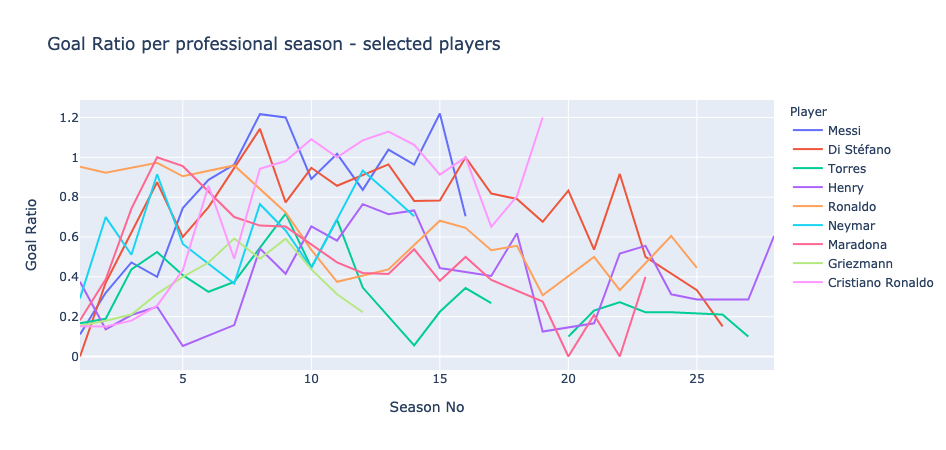

In [91]:
messi_stat=messi.assign(Matches = 1)\
   .groupby('Temporada').agg({'Matches':sum,'Goles_Messi':sum}).reset_index()

messi_stat["Goal Ratio"] = messi_stat["Goles_Messi"].astype(int)/messi_stat["Matches"].astype(int)
messi_stat['Season No'] = messi_stat.index + 1 
messi_stat=messi_stat[["Season No", "Goal Ratio"]]

messi_stat["Player"] = "Messi"
distefano["Player"] = "Di Stéfano"
torres["Player"] = "Torres"
henry["Player"] = "Henry"
ronaldo["Player"] ="Ronaldo"
neymar["Player"]="Neymar"
maradona["Player"]="Maradona"
griezmann["Player"]="Griezmann"
cr["Player"]="Cristiano Ronaldo"


player_comparison = pd.concat([messi_stat,distefano,torres,henry,ronaldo,neymar,maradona,griezmann,cr])


fig = px.line(player_comparison, x="Season No", y="Goal Ratio",
                       color="Player",
                       title="Goal Ratio per professional season - selected players")


fig.show()

fig.write_html("messi_1.html")

It looks like that Messi has had so far a quite good run, with consistency only comparable to [Cristiano Ronaldo](https://en.wikipedia.org/wiki/Cristiano_Ronaldo) and [Alfredo Di Stéfano](https://en.wikipedia.org/wiki/Alfredo_Di_St%C3%A9fano). These three players stand out from the rest of the selection, with others fizzling out after a couple of seasons.

Well, having a lot of goals per season is good. But how does that related to Barcelona winning matches? Let's have a look the team results when Messi was on the field. The below chart presents a summary per season.


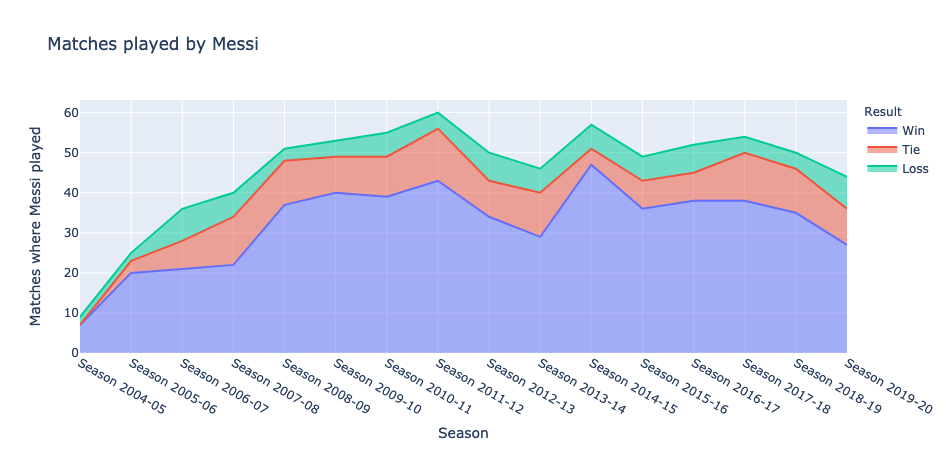

In [92]:
messi_stat=messi.assign(Win = np.where(messi['Resultado']=='Win',1,0),
             Tie = np.where(messi['Resultado']=='Tie',1,0),
             Loss= np.where(messi['Resultado']=='Loss',1,0))\
   .groupby('Temporada').agg({'Win':sum,'Tie':sum,'Loss':sum}).reset_index()
messi_stat["Season"] = messi_stat["Temporada"]


messi_stat=messi_stat.melt(id_vars=['Season'], value_vars=['Win','Tie','Loss'],
        var_name='Result', value_name='Matches where Messi played')


fig = px.area(messi_stat, x="Season", y="Matches where Messi played",
                      color="Result",
                       title="Matches played by Messi")

fig.show()

fig.write_html("messi_2.html")


Then, the below charts presents the teams results split by Messi's contribution to the score.

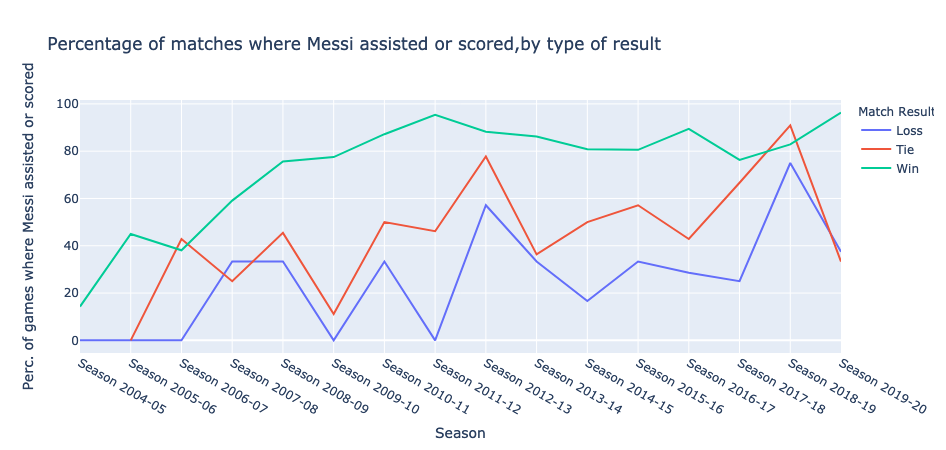

In [97]:
# first summary
messi_stat = messi.groupby(["Resultado","Temporada"]).agg({"Gol_o_Asistencia": "sum",
                                              "Partido": "size"}).reset_index()
messi_stat["Perc. of games where Messi assisted or scored"] = 100*messi_stat["Gol_o_Asistencia"] / messi_stat["Partido"]
messi_stat=messi_stat.drop(columns=["Gol_o_Asistencia","Partido"])
messi_stat["Match Result"] = messi_stat["Resultado"]
messi_stat["Season"] = messi_stat["Temporada"]


fig = px.line(messi_stat, x="Season", y="Perc. of games where Messi assisted or scored",
                       color="Match Result",
                       title="Percentage of matches where Messi assisted or scored,by type of result")


fig.show()

fig.write_html("messi_3.html")

From the charts, it is clear there is a "Messi" factor - when he is on the field, Barcelona tends to obtain a good result and he is an active contributor towards that end! Most importantly,  this has been the case for over a decade and it does not seem his performance is going down. Looking at this, it is quite understandable why the club wanted to retain him!

Having said that, Messi's presence on the field does not reflect equally across all competions where the club takes part. Win/Messi correlation seems to be stronger for the Spanish national League compared to Euopean championships.

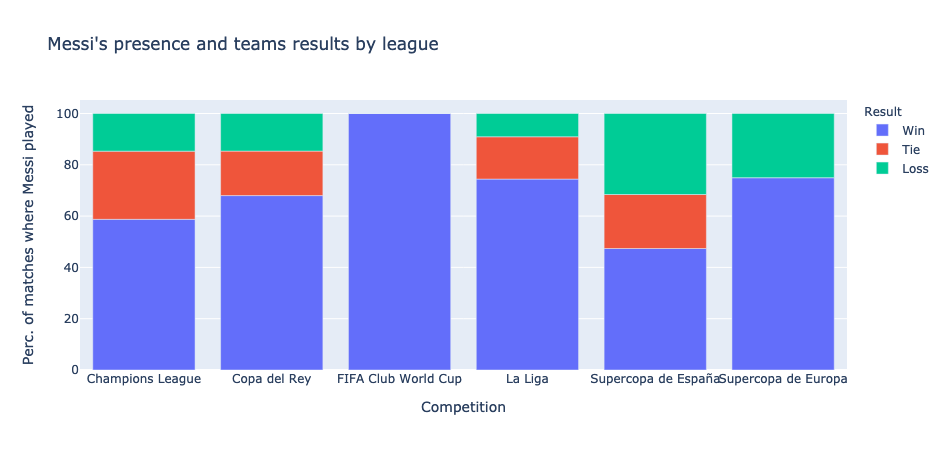

In [94]:
messi_stat=messi.assign(Win = np.where(messi['Resultado']=='Win',1,0),
             Tie = np.where(messi['Resultado']=='Tie',1,0),
             Loss= np.where(messi['Resultado']=='Loss',1,0))\
   .groupby('Competición').agg({'Win':sum,'Tie':sum,'Loss':sum}).reset_index()


messi_stat["Total"] = messi_stat["Win"] + messi_stat["Tie"] +  messi_stat["Loss"]
messi_stat['Win']=100*messi_stat['Win']/messi_stat['Total']
messi_stat['Tie']=100*messi_stat['Tie']/messi_stat["Total"]
messi_stat['Loss']=100*messi_stat['Loss']/messi_stat['Total']
messi_stat['Competition']=messi_stat['Competición']

messi_stat=messi_stat.melt(id_vars=['Competition'], value_vars=['Win','Tie','Loss'],
        var_name='Result', value_name='Perc. of matches where Messi played')

fig = px.bar(messi_stat, x="Competition", y="Perc. of matches where Messi played",
                       color="Result",
                       title="Messi's presence and teams results by league")


fig.show()

fig.write_html("messi_4.html")

As expected, Spanish teams are the ones that most frequently find themselves on the receiving end of Messi's scoring. [SD Eibar](https://en.wikipedia.org/wiki/SD_Eibar) has "honour" of getting 20 goals in 11 matches, with teams like [Osasuna](), [Levante](), [Betis]() and [Rayo Vallecano]() also expecting to be beaten by him on every encounter!


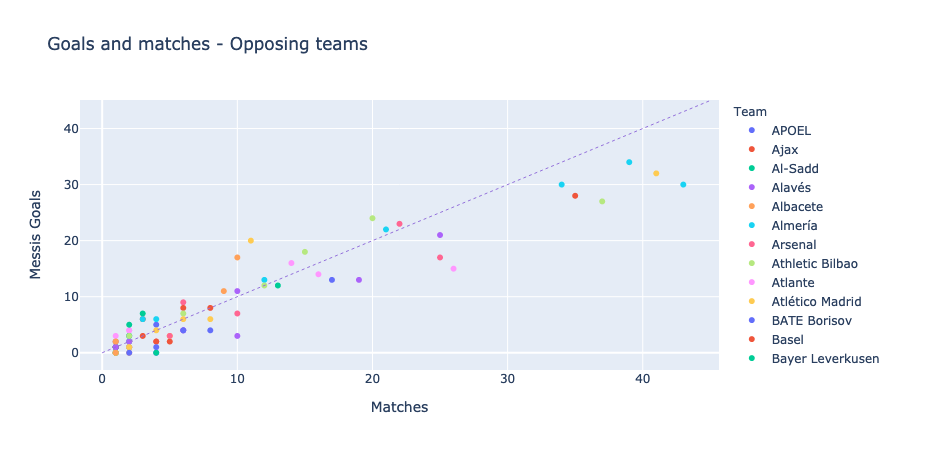

In [96]:
messi_stat=messi.groupby(["Equipo"]).agg({"Goles_Messi": "sum",
                                              "Partido": "size"}).reset_index()

messi_stat["Team"] = messi_stat["Equipo"]
#messi_stat["Competition"]=messi_stat["Competición"]
messi_stat["Messis Goals"] =messi_stat["Goles_Messi"]
messi_stat["Matches"] = messi_stat["Partido"]


fig = px.scatter(messi_stat, x="Matches", y="Messis Goals",
                       color="Team",
                       hover_name="Team",
                       title="Goals and matches - Opposing teams")


fig.add_shape(type="line",
    x0=0, y0=0, x1=45, y1=45,
    line=dict(
        color="MediumPurple",
        width=1,
        dash="dot",
    )
)

fig.show()

fig.write_html("messi_5.html")

**Notes/Technical Details:**

1. This analysis has been done using **Python** and [JupiterLab](https://jupyterlab.readthedocs.io/en/stable/). You can find the notebook file [here](https://github.com/carlosyanez/Messi_Stats).
2. All stats have been sourced from **Wikipedia**, using [Beatiful Soup](https://www.crummy.com/software/BeautifulSoup/). All links are cointained in the notebook's code.
3. All charts have been created by [plotly](https://plotly.com/python/plotly-express/).
4. I'm not a football expert, but I acknowledge the game is more than numbers. I'm claiming that Messi is the best player ever...

